In [2]:
# part (a)
import pandas as pd

#reading csv
df = pd.read_csv("Advertising.csv")
print(df.head())
print(df.info())

   Unnamed: 0     TV  radio  newspaper  sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
Unnamed: 0    200 non-null int64
TV            200 non-null float64
radio         200 non-null float64
newspaper     200 non-null float64
sales         200 non-null float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB
None


In [3]:
# dropping column 'Unnamed: 0'

dfdata = df.drop(columns = 'Unnamed: 0')
print(dfdata.head())
print(dfdata.info())

      TV  radio  newspaper  sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
radio        200 non-null float64
newspaper    200 non-null float64
sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.3 KB
None


In [26]:
# part (b)

import statsmodels.formula.api as smf

#fitting a model as multi-linear regression: (as follows)
# sales = beta_0 + (beta_1 * TV) + (beta_2*radio) + (beta_3 * newspaper)
model_1 = smf.ols('sales ~ TV + radio + newspaper',dfdata).fit()
print(model_1.summary())
print("----- p-values ------")
print(model_1.pvalues)
#model_1.conf_int(alpha=0.05, cols=None)

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Tue, 28 Jan 2020   Prob (F-statistic):           1.58e-96
Time:                        11:12:03   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001871E06EC18>,
      dtype=object)

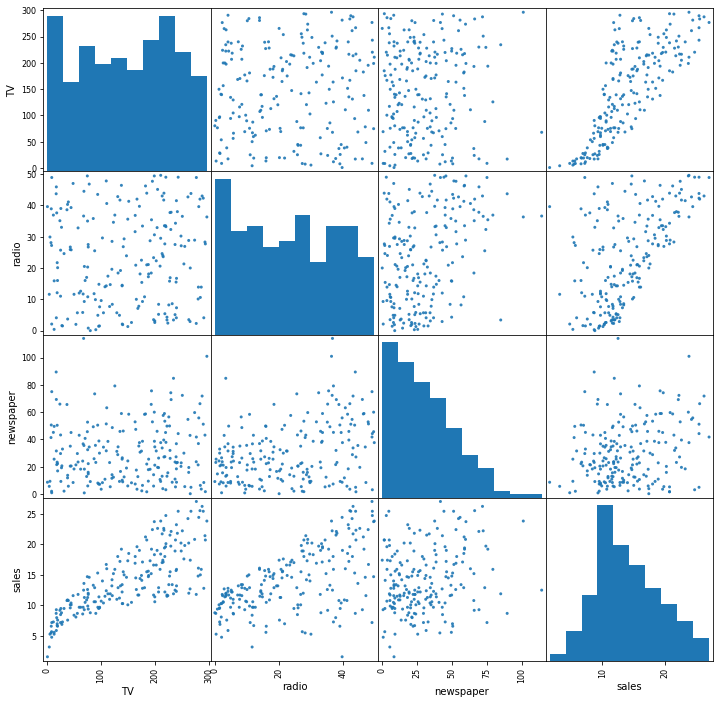

In [24]:
from pandas.plotting import scatter_matrix
scatter_matrix(dfdata, alpha=0.9, figsize=(12,12), diagonal='hist')


In [10]:
#calculating correleation coefficients between a pair of features.
pair_corr_coeff = dfdata.corr()
print(pair_corr_coeff)

# Another style of displaying the above result
pair_corr_coeff.abs().style.background_gradient()

                 TV     radio  newspaper     sales
TV         1.000000  0.054809   0.056648  0.782224
radio      0.054809  1.000000   0.354104  0.576223
newspaper  0.056648  0.354104   1.000000  0.228299
sales      0.782224  0.576223   0.228299  1.000000


,TV,radio,newspaper,sales
TV,1,0.0548087,0.0566479,0.782224
radio,0.0548087,1,0.354104,0.576223
newspaper,0.0566479,0.354104,1,0.228299
sales,0.782224,0.576223,0.228299,1


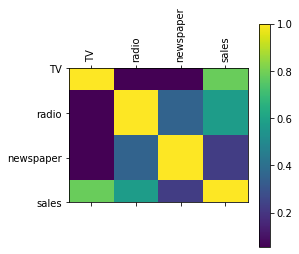

In [14]:
# Another style of displaying the correleation coefficients
# Creating a color matrix plot of correlation of the pairs of the features.

import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
plt.matshow(np.abs(pair_corr_coeff))
plt.colorbar()
plt.xticks(range(len(pair_corr_coeff.columns)), pair_corr_coeff.columns, rotation='vertical');
plt.yticks(range(len(pair_corr_coeff.columns)),pair_corr_coeff.columns);


In [17]:
# compute VIF of each feature.
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices
#gather features
formula1 = 'sales ~ TV + radio + newspaper'

# get Y and X dataframes based on this regression:
yvar, Xvar = dmatrices(formula1, dfdata, return_type='dataframe')

#print(Xvar)
# For each Xvar, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(Xvar.values, i) for i in range(Xvar.shape[1])]
vif["Predictors"] = Xvar.columns
vif.round(3)

,VIF,Predictors
0,6.849,Intercept
1,1.005,TV
2,1.145,radio
3,1.145,newspaper


([<matplotlib.lines.Line2D at 0x1871d2dadd8>],
 Text(0.5, 0, 'predicted sales'),
 Text(0, 0.5, 'Studentized residuals'))

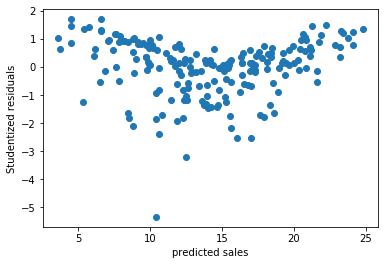

In [18]:
# First comute the studentized residuals.
studentized_residuals_model1 = model_1.get_influence().resid_studentized_internal
#Second computer the predicted values of Y from the model.
predicted_Y_model1 = model_1.predict()

plt.plot(predicted_Y_model1, studentized_residuals_model1, 'o'), plt.xlabel("predicted sales"), plt.ylabel("Studentized residuals")

(Text(0.5, 0, 'predicted sales'), Text(0, 0.5, 'studentized residual'))

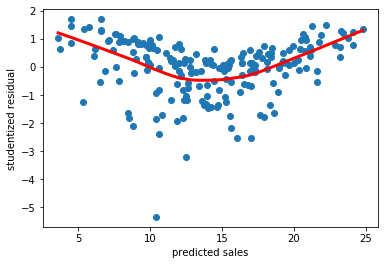

In [20]:
from statsmodels.nonparametric.smoothers_lowess import lowess

multi_lowess_result = lowess(studentized_residuals_model1, predicted_Y_model1, is_sorted=False, frac=1/2, it=0)

plt.plot(predicted_Y_model1, studentized_residuals_model1, 'o'), plt.xlabel("predicted sales"), plt.ylabel("Studentized residuals")

plt.plot(multi_lowess_result[:, 0], multi_lowess_result[:, 1], 'r-', linewidth = 3)

plt.xlabel('predicted sales'), plt.ylabel('studentized residual')

In [28]:
# Let's create the second model as asked.
model_2 = smf.ols("sales ~ TV + radio + (TV * radio)",dfdata).fit()
print(model_2.summary())
print("---- p-values -----")
print(model_2.pvalues.sort_values())

print("--- Significant Features - features with p-values < 5% ------")
print(model_2.pvalues[model_2.pvalues<0.05])

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1963.
Date:                Tue, 28 Jan 2020   Prob (F-statistic):          6.68e-146
Time:                        11:12:58   Log-Likelihood:                -270.14
No. Observations:                 200   AIC:                             548.3
Df Residuals:                     196   BIC:                             561.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.7502      0.248     27.233      0.0

In [33]:
from statsmodels.nonparametric.smoothers_lowess import lowess

# performing diagnostics of the least squares regression fit on model-2
#First compute the studentized residuals.

studentized_residuals_model2 = model_2.get_influence().resid_studentized_internal

# Second compute the predicted values of Y from the model.
predicted_Y_model_2 = model_2.predict()

plt.plot(predicted_Y_model_2, studentized_residuals_model2, predicted_Y_model2, is_sorted=False, frac=1/2, it=0)

plt.plot(multi_lowess_result[:, 0], multi_lowess_result[:, 1], 'r-', linewidth=3)

plt.xlabel('predicted sales'), plt.ylabel('studentized residual')

NameError: name 'predicted_Y_model2' is not defined